# Setup

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from plotly.subplots import make_subplots
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
sns.set_theme()

# Data Loading

In [3]:
data = fetch_openml("mnist_784", parser="auto")

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
print(data.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [6]:
df = pd.DataFrame(data.frame)
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


# Data Visualization

In [7]:
sample_images = df.groupby("class").sample(1).drop(columns="class").to_numpy().reshape(10, 28, 28)

In [8]:
fig = px.imshow(sample_images, facet_col=0, facet_col_wrap=5, color_continuous_scale="gray")
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20), coloraxis_showscale=False)
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.show()

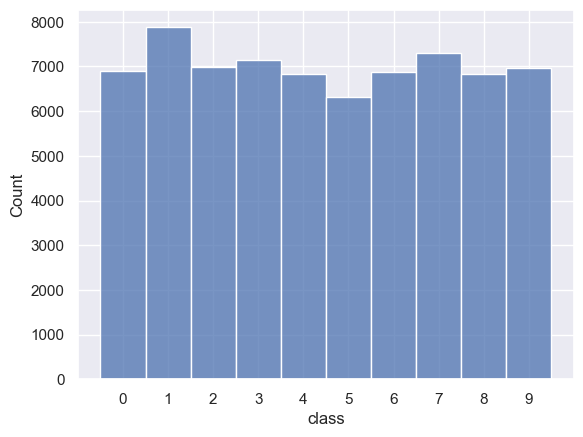

In [9]:
_ = sns.histplot(df, x="class")

# Data Preparation

In [10]:
X = data.data
y = data.target

## Train Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Modeling

## Null Accuracy

In [12]:
outcomes = y.value_counts(normalize=True)
outcomes.max()

0.11252857142857142

## MLP

In [13]:
model = MLPClassifier(verbose=True)
_ = model.fit(X_train, y_train)

Iteration 1, loss = 3.56530005
Iteration 2, loss = 1.06598610
Iteration 3, loss = 0.56046408
Iteration 4, loss = 0.37808581
Iteration 5, loss = 0.27808524
Iteration 6, loss = 0.22258276
Iteration 7, loss = 0.17912965
Iteration 8, loss = 0.16088152
Iteration 9, loss = 0.13293045
Iteration 10, loss = 0.12713947
Iteration 11, loss = 0.12132601
Iteration 12, loss = 0.11654316
Iteration 13, loss = 0.11521718
Iteration 14, loss = 0.10779505
Iteration 15, loss = 0.10382180
Iteration 16, loss = 0.09208167
Iteration 17, loss = 0.09235190
Iteration 18, loss = 0.09105285
Iteration 19, loss = 0.09457386
Iteration 20, loss = 0.08444801
Iteration 21, loss = 0.08635317
Iteration 22, loss = 0.08765129
Iteration 23, loss = 0.08417478
Iteration 24, loss = 0.07406880
Iteration 25, loss = 0.07978950
Iteration 26, loss = 0.08025744
Iteration 27, loss = 0.06808738
Iteration 28, loss = 0.06993314
Iteration 29, loss = 0.06552082
Iteration 30, loss = 0.06058556
Iteration 31, loss = 0.06274079
Iteration 32, los

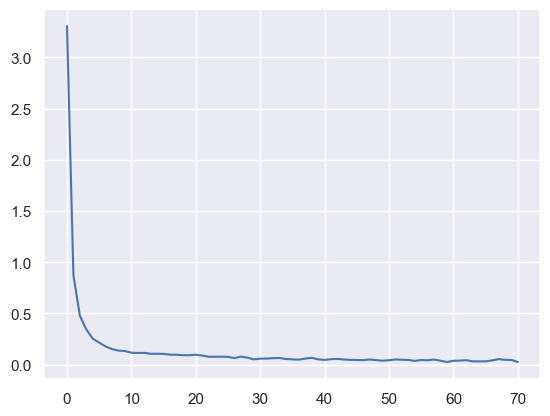

In [ ]:
_ = sns.lineplot(model.loss_curve_)

In [ ]:
model.score(X_test, y_test)

0.9646285714285714

## Grid Search

In [ ]:
model = MLPClassifier()
# , solver=["lbfgs", "sgd", "adam"]
param_grid = dict(activation=["logistic", "relu"])
grid = GridSearchCV(model, param_grid=param_grid, scoring="accuracy", cv=10, verbose=True)
# _ = grid.fit(X_train, y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


C:\Users\marce\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:693: UserWarning:

Training interrupted by user.



In [ ]:
grid_results = pd.DataFrame(grid.cv_results_)

In [ ]:
_ = sns.lineplot(x=grid_results["param_solver"], y=grid_results["mean_test_score"], hue=grid_results["param_activation"])

In [ ]:
print(grid.best_score_)
print(grid.best_params_)